In [2]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 39.89 MiB/s, done.
Resolving deltas: 100% (513/513), done.
/kaggle/working/yolov7/yolov7


In [3]:
!pip install --upgrade pip
!pip install numpy==1.26.4
!pip install matplotlib pillow opencv-python tqdm pyyaml scipy seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 47.7 MB/s  0:00:00eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires jupyter-server==2.14.0, but you have jupyter-server 2.12.5 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have request

In [4]:
!cp /kaggle/input/fallenperson7/data.yaml ./data.yaml

In [5]:
!cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']

roboflow:
  workspace: rescue-robot-datasets
  project: fallen-person-uhif8-0zrzv
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/rescue-robot-datasets/fallen-person-uhif8-0zrzv/dataset/1

In [6]:
%%writefile data.yaml
train: /kaggle/input/fallenperson7/train/images
val: /kaggle/input/fallenperson7/valid/images
test: /kaggle/input/fallenperson7/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']

Overwriting data.yaml


In [19]:
!cat data.yaml

train: /kaggle/input/fallenperson7/train/images
val: /kaggle/input/fallenperson7/valid/images
test: /kaggle/input/fallenperson7/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']


In [22]:
!mkdir -p /kaggle/working/fallenperson7/{train,valid,test}/{images,labels}
!cp -r /kaggle/input/fallenperson7/train/images /kaggle/working/fallenperson7/train/
!cp -r /kaggle/input/fallenperson7/train/labels /kaggle/working/fallenperson7/train/
!cp -r /kaggle/input/fallenperson7/valid/images /kaggle/working/fallenperson7/valid/
!cp -r /kaggle/input/fallenperson7/valid/labels /kaggle/working/fallenperson7/valid/
!cp -r /kaggle/input/fallenperson7/test/images /kaggle/working/fallenperson7/test/
!cp -r /kaggle/input/fallenperson7/test/labels /kaggle/working/fallenperson7/test/


In [27]:
data_yaml = """
train: /kaggle/working/fallenperson7/train/images
val: /kaggle/working/fallenperson7/valid/images
test: /kaggle/working/fallenperson7/test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']
"""

with open("/kaggle/working/fallenperson7/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml güncellendi")


data.yaml güncellendi


In [28]:
!python /kaggle/working/yolov7/yolov7/train.py \
--img 640 \
--batch 16 \
--epochs 100 \
--data /kaggle/working/fallenperson7/data.yaml \
--cfg /kaggle/working/yolov7/yolov7/cfg/training/yolov7-tiny.yaml \
--weights /kaggle/working/yolov7/yolov7/yolov7-tiny.pt \
--device 0 \
--cache-images

2026-01-03 20:49:44.153539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767473384.175122     304 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767473384.182271     304 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767473384.199190     304 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767473384.199217     304 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767473384.199220     304 computation_placer.cc:177] computation placer alr

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

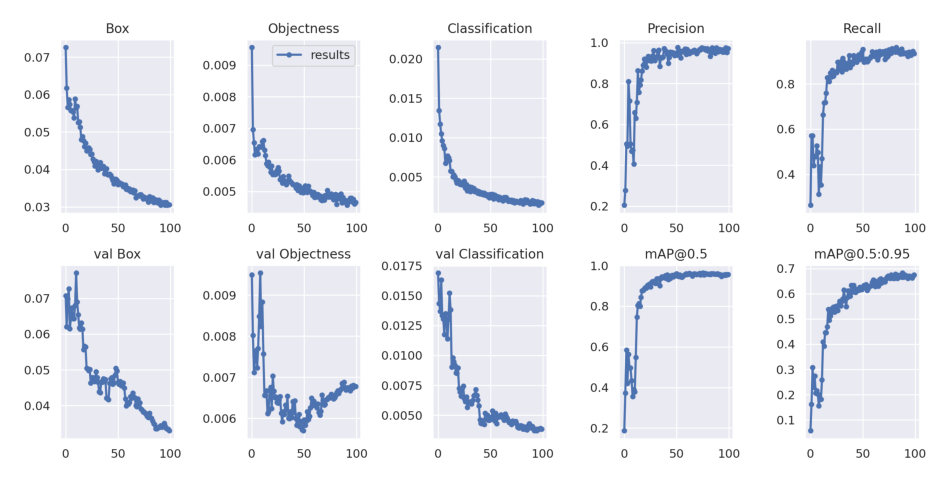

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/results.png')
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

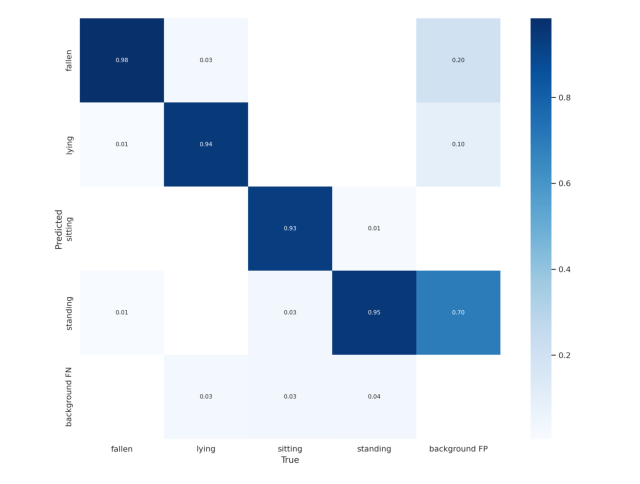

In [36]:
img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/confusion_matrix.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(2249.5), np.float64(1499.5), np.float64(-0.5))

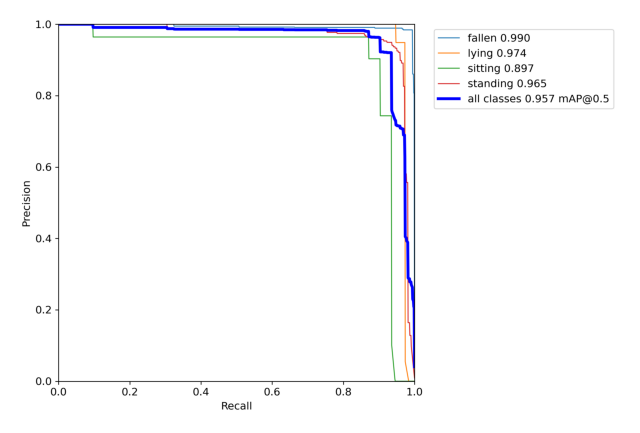

In [37]:
img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/PR_curve.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(2249.5), np.float64(1499.5), np.float64(-0.5))

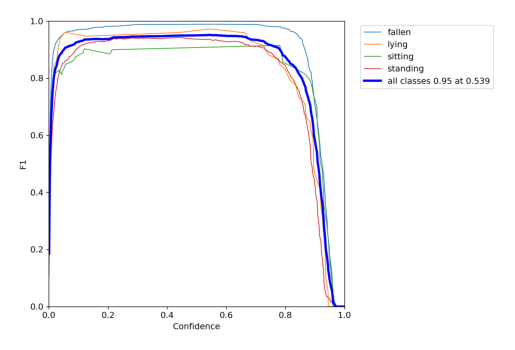

In [38]:
img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/P_curve.png')
plt.imshow(img); plt.axis('off')

img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/R_curve.png')
plt.imshow(img); plt.axis('off')

img = Image.open('/kaggle/working/yolov7/yolov7/runs/train/exp4/F1_curve.png')
plt.imshow(img); plt.axis('off')